In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
!pip install split-folders
import splitfolders

In [10]:
splitfolders.ratio("/kaggle/input/english/asl_alphabet_train/asl_alphabet_train",
                   "/kaggle/working/output",ratio=(0.85,0.15))

Copying files: 87000 files [11:43, 123.62 files/s]


In [35]:
valid_dir='/kaggle/working/output/val'
train_dir='/kaggle/working/output/train'

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
datagen=ImageDataGenerator(
rescale=1./255.,
horizontal_flip=True
)

validdatagen=ImageDataGenerator(
rescale=1./255.
)



In [39]:
batch_size=32

train_data=datagen.flow_from_directory(
    train_dir,
    seed=123,           # Seed for reproducibility
    shuffle=True,       # Shuffle the dataset during training
    target_size=(200, 200),   # Resize images to specified dimensions
    batch_size=batch_size,
)

Found 73950 images belonging to 29 classes.


In [40]:
valid_data=validdatagen.flow_from_directory(
    valid_dir,
    seed=123,           # Seed for reproducibility
    shuffle=False,       # Shuffle the dataset during training
    target_size=(200, 200),   # Resize images to specified dimensions
    batch_size=batch_size,
)

Found 13050 images belonging to 29 classes.


In [41]:
train_data.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [42]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(input_shape = (200, 200, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [43]:
base_model.trainable=False

In [44]:
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(29, activation='softmax')
    ])

In [45]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='acc')

In [46]:
history=model.fit(train_data,validation_data=valid_data,epochs=10)

Epoch 1/10
2311/2311 [==============================] - 149s 63ms/step - loss: 0.1894 - acc: 0.9444 - val_loss: 0.0195 - val_acc: 0.9943
Epoch 2/10
2311/2311 [==============================] - 145s 63ms/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0072 - val_acc: 0.9972
Epoch 3/10
2311/2311 [==============================] - 150s 65ms/step - loss: 0.0285 - acc: 0.9912 - val_loss: 0.0122 - val_acc: 0.9959
Epoch 4/10
2311/2311 [==============================] - 144s 62ms/step - loss: 0.0289 - acc: 0.9918 - val_loss: 0.0041 - val_acc: 0.9985
Epoch 5/10
2311/2311 [==============================] - 142s 61ms/step - loss: 0.0227 - acc: 0.9938 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 6/10
2311/2311 [==============================] - 145s 63ms/step - loss: 0.0251 - acc: 0.9933 - val_loss: 0.0022 - val_acc: 0.9993
Epoch 7/10
2311/2311 [==============================] - 146s 63ms/step - loss: 0.0229 - acc: 0.9943 - val_loss: 0.0034 - val_acc: 0.9988
Epoch 8/10
2311/2311 [===================

In [47]:
classes = ['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X','Y','Z','del','nothing','space']

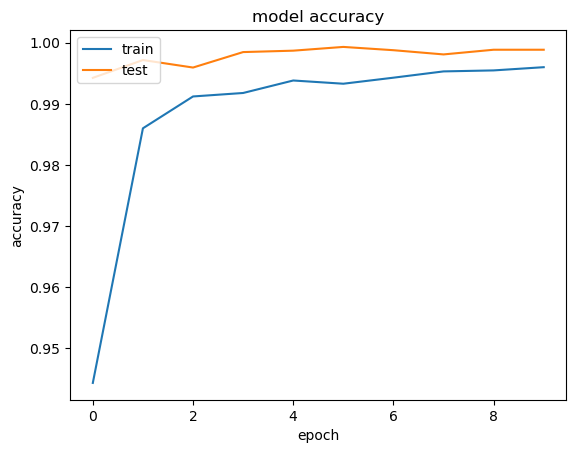

In [53]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


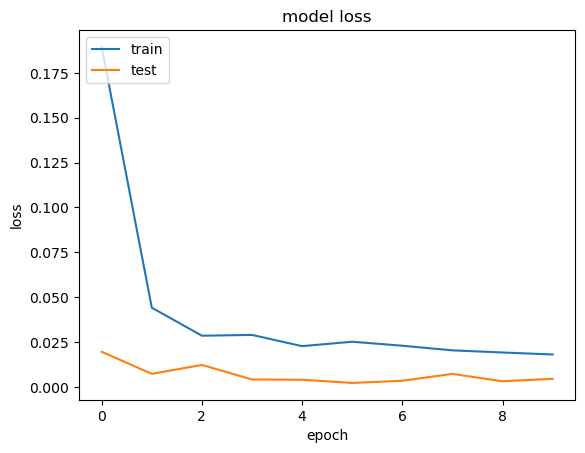

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 461ms/step
0


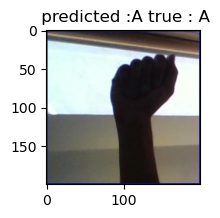

1/1 [==============================] - 0s 23ms/step
4


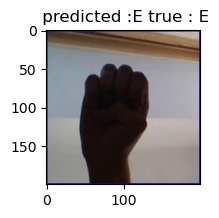

1/1 [==============================] - 0s 24ms/step
11


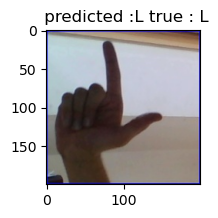

1/1 [==============================] - 0s 22ms/step
13


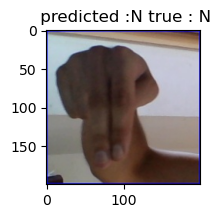

1/1 [==============================] - 0s 23ms/step
18


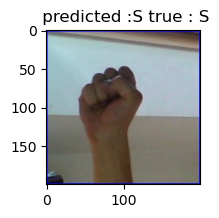

1/1 [==============================] - 0s 21ms/step
3


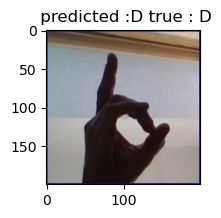

1/1 [==============================] - 0s 22ms/step
6


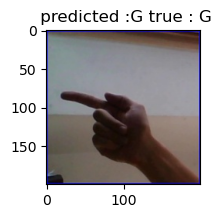

1/1 [==============================] - 0s 21ms/step
8


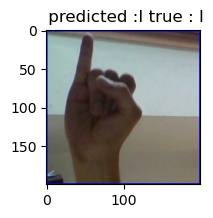

1/1 [==============================] - 0s 22ms/step
22


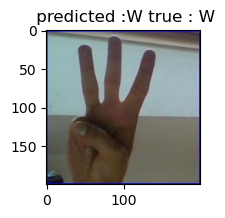

1/1 [==============================] - 0s 22ms/step
12


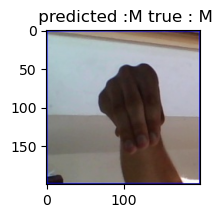

1/1 [==============================] - 0s 21ms/step
27


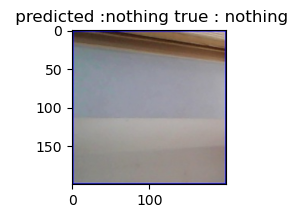

1/1 [==============================] - 0s 21ms/step
23


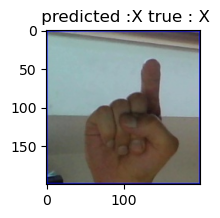

1/1 [==============================] - 0s 22ms/step
7


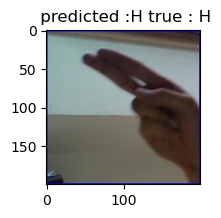

1/1 [==============================] - 0s 21ms/step
16


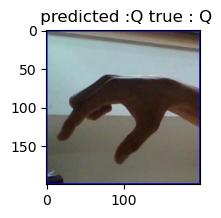

1/1 [==============================] - 0s 21ms/step
2


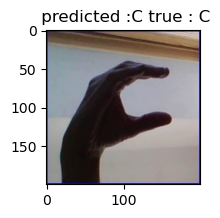

1/1 [==============================] - 0s 21ms/step
19


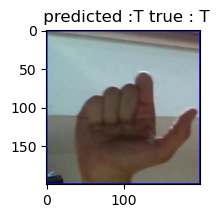

1/1 [==============================] - 0s 26ms/step
15


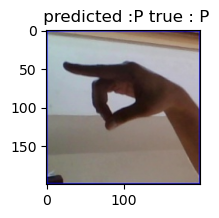

1/1 [==============================] - 0s 22ms/step
21


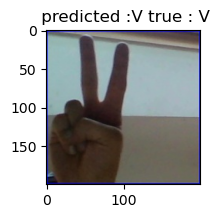

1/1 [==============================] - 0s 21ms/step
24


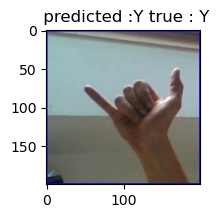

1/1 [==============================] - 0s 21ms/step
20


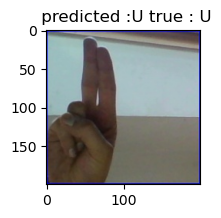

1/1 [==============================] - 0s 22ms/step
28


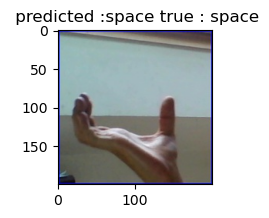

1/1 [==============================] - 0s 23ms/step
14


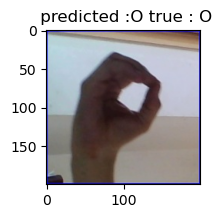

1/1 [==============================] - 0s 21ms/step
1


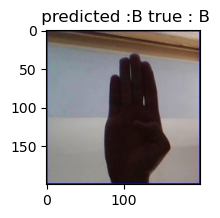

1/1 [==============================] - 0s 23ms/step
17


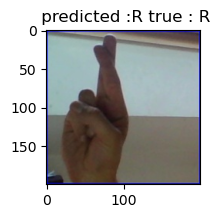

1/1 [==============================] - 0s 39ms/step
5


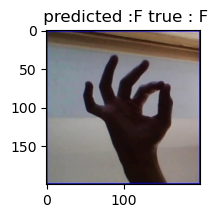

1/1 [==============================] - 0s 34ms/step
25


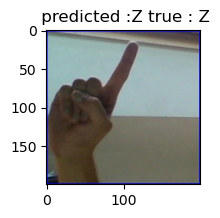

1/1 [==============================] - 0s 36ms/step
9


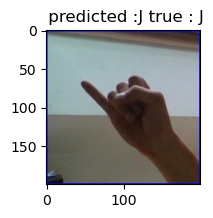

1/1 [==============================] - 0s 34ms/step
10


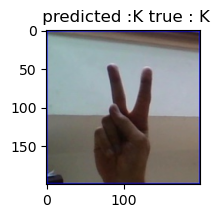

In [48]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

def load_and_preprocess_image(image_path, target_size=(200, 200)):
    img = keras_image.load_img(image_path, target_size=target_size)
    img = keras_image.img_to_array(img)
    img /= 255.0
    #img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img


# Specify the path to the image folder
folder_path = '/kaggle/input/english/asl_alphabet_test/asl_alphabet_test'
image_files = os.listdir(folder_path)

# List to store preprocessed images
images = []
for img_filename in image_files:
    or_img = keras_image.load_img(os.path.join(folder_path, img_filename), target_size=(200,200))
    image_path = os.path.join(folder_path, img_filename)
    input_image = load_and_preprocess_image(image_path)
    predictions=model.predict(input_image)
    prediction=np.argmax(predictions[0])
    print(prediction)
    images.append(input_image)  
    plt.figure(figsize=(2,2))
    plt.imshow(or_img)
    plt.title(' predicted :'+ classes[prediction] + ' true : ' + img_filename[:-9])
    plt.show()

In [49]:
model.save('mobile_net_HF_true.h5')